In [1]:
display(HTML("<style>.rendered_html.text_cell_render {max-width:700px; }</style>"));

HTML{String}("<style>.rendered_html.text_cell_render {max-width:700px; }</style>")

# Sample density - a reality check

We are comparing the analytically computed density of a push-forward with its approximate "sample density".

**How to correctly set the histogram weights.**

Recall that for a large number of $n$ samples $x_1, \ldots, x_n$ we have

$$
    Q(X) = \int_X q(x) dx = \mathbb{E}_Q[ \mathbb{1}_X(x)]  \approx \frac{1}{n} \sum_i^n \mathbb{1}_X(x_i).
$$

Recall further that for "small bin" $B$ containing $x$ we have

$$
    q(x) \approx \frac{Q(B)}{|B|} = \frac{1}{ \underbrace{|B|}_{\text{Bin size}} n } \cdot \underbrace{ \sum_i^n \mathbb{1}_{dx}(x_i)}_{\text{Bin count}}.
$$

In [2]:
include("src/GenPushForward.jl")
using .GenPushForward
using Gen
using Plots
using StatsBase, Plots
col = palette(:tab10);

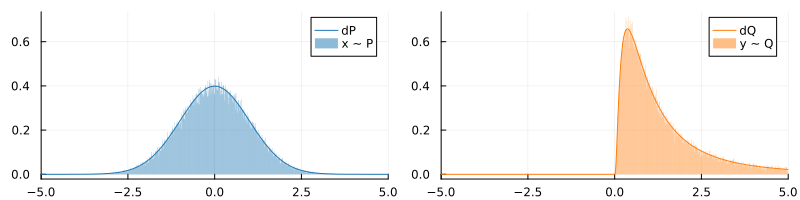

In [4]:
args = (0.0, 1.);
P = normal;
p = x -> exp(logpdf(P, x, args...));

f     =  x -> exp(x);
detdf =  x -> exp(x);
g     =  y -> y > 0 ? log(y) : out_of_domain;

Q = PushForward(P, f, g, detdf, Float64);
q = x -> exp(logpdf(Q, x, args...));


dx = 0.01
xs = -10:dx:10;

n = 100_000;
Q_samples = [Q(args...) for t=1:n];
P_samples = [P(args...) for t=1:n];

weights = ones(n)/n/dx

# --------------------------------------------
p1 = plot(xlim=(-5,5));
plot!(xs, p.(xs), label="dP", color=col[1]);
histogram!(P_samples, weights=weights, bins=-5:dx:5, 
           color=col[1], label="x ~ P", alpha=.5, markerstrokecolor=:red, 
           linewidth=0., linecolor=:white);

p2 = plot(xlim=(-5,5));
plot!(xs, q.(xs), label="dQ", color=col[2]);
histogram!(Q_samples, weights=weights, bins=-5:dx:5, 
           color=col[2], label="y ~ Q", alpha=.5, markerstrokecolor=:red, 
           linewidth=0., linecolor=:white);

l = grid(1, 2,  
    widths  = [0.5,0.5])
plot(p1, p2, layout = l, link=:y,  size=(800,200))